Problem 1

In [9]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
df = pd.read_csv("hw5_data.csv",sep='\s*,\s*')

C:\Users\wealt\AppData\Local\Temp\ipykernel_12304\3754140567.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("hw5_data.csv",sep='\s*,\s*')


In [10]:
df_dum = pd.get_dummies(df)
df_dum

,Customer ID,Gender_F,Gender_M,Car Type_Family,Car Type_Luxury,Car Type_Sports,Shirt Size_Extra Large,Shirt Size_Large,Shirt Size_Medium,Shirt Size_Small,Class_C0,Class_C1
0,1,0,1,1,0,0,0,0,0,1,1,0
1,2,0,1,1,0,0,0,0,1,0,1,0
2,3,0,1,1,0,0,1,0,0,0,1,0
3,4,0,1,0,0,1,1,0,0,0,1,0
4,5,0,1,1,0,0,0,1,0,0,1,0
5,6,0,1,1,0,0,1,0,0,0,1,0
6,7,0,1,0,1,0,1,0,0,0,1,0
7,8,1,0,1,0,0,0,0,0,1,1,0
8,9,1,0,1,0,0,0,0,1,0,1,0
9,10,1,0,0,1,0,0,1,0,0,1,0


In [11]:
feature_col = df_dum.columns[1:-2]
feature_col

Index(['Gender_F', 'Gender_M', 'Car Type_Family', 'Car Type_Luxury',
       'Car Type_Sports', 'Shirt Size_Extra Large', 'Shirt Size_Large',
       'Shirt Size_Medium', 'Shirt Size_Small'],
      dtype='object')

In [12]:
X = df_dum[feature_col]
label = pd.get_dummies(df['Class'])
print(label)

    C0  C1
0    1   0
1    1   0
2    1   0
3    1   0
4    1   0
5    1   0
6    1   0
7    1   0
8    1   0
9    1   0
10   1   0
11   0   1
12   0   1
13   0   1
14   0   1
15   0   1
16   0   1
17   0   1
18   0   1
19   0   1


In [13]:
X_dum = pd.get_dummies(X)
X_dum

,Gender_F,Gender_M,Car Type_Family,Car Type_Luxury,Car Type_Sports,Shirt Size_Extra Large,Shirt Size_Large,Shirt Size_Medium,Shirt Size_Small
0,0,1,1,0,0,0,0,0,1
1,0,1,1,0,0,0,0,1,0
2,0,1,1,0,0,1,0,0,0
3,0,1,0,0,1,1,0,0,0
4,0,1,1,0,0,0,1,0,0
5,0,1,1,0,0,1,0,0,0
6,0,1,0,1,0,1,0,0,0
7,1,0,1,0,0,0,0,0,1
8,1,0,1,0,0,0,0,1,0
9,1,0,0,1,0,0,1,0,0


In [14]:
clf = DecisionTreeClassifier(criterion = 'gini')
model = clf.fit(X,label)

In [7]:
from matplotlib import pyplot as plt
from sklearn import tree

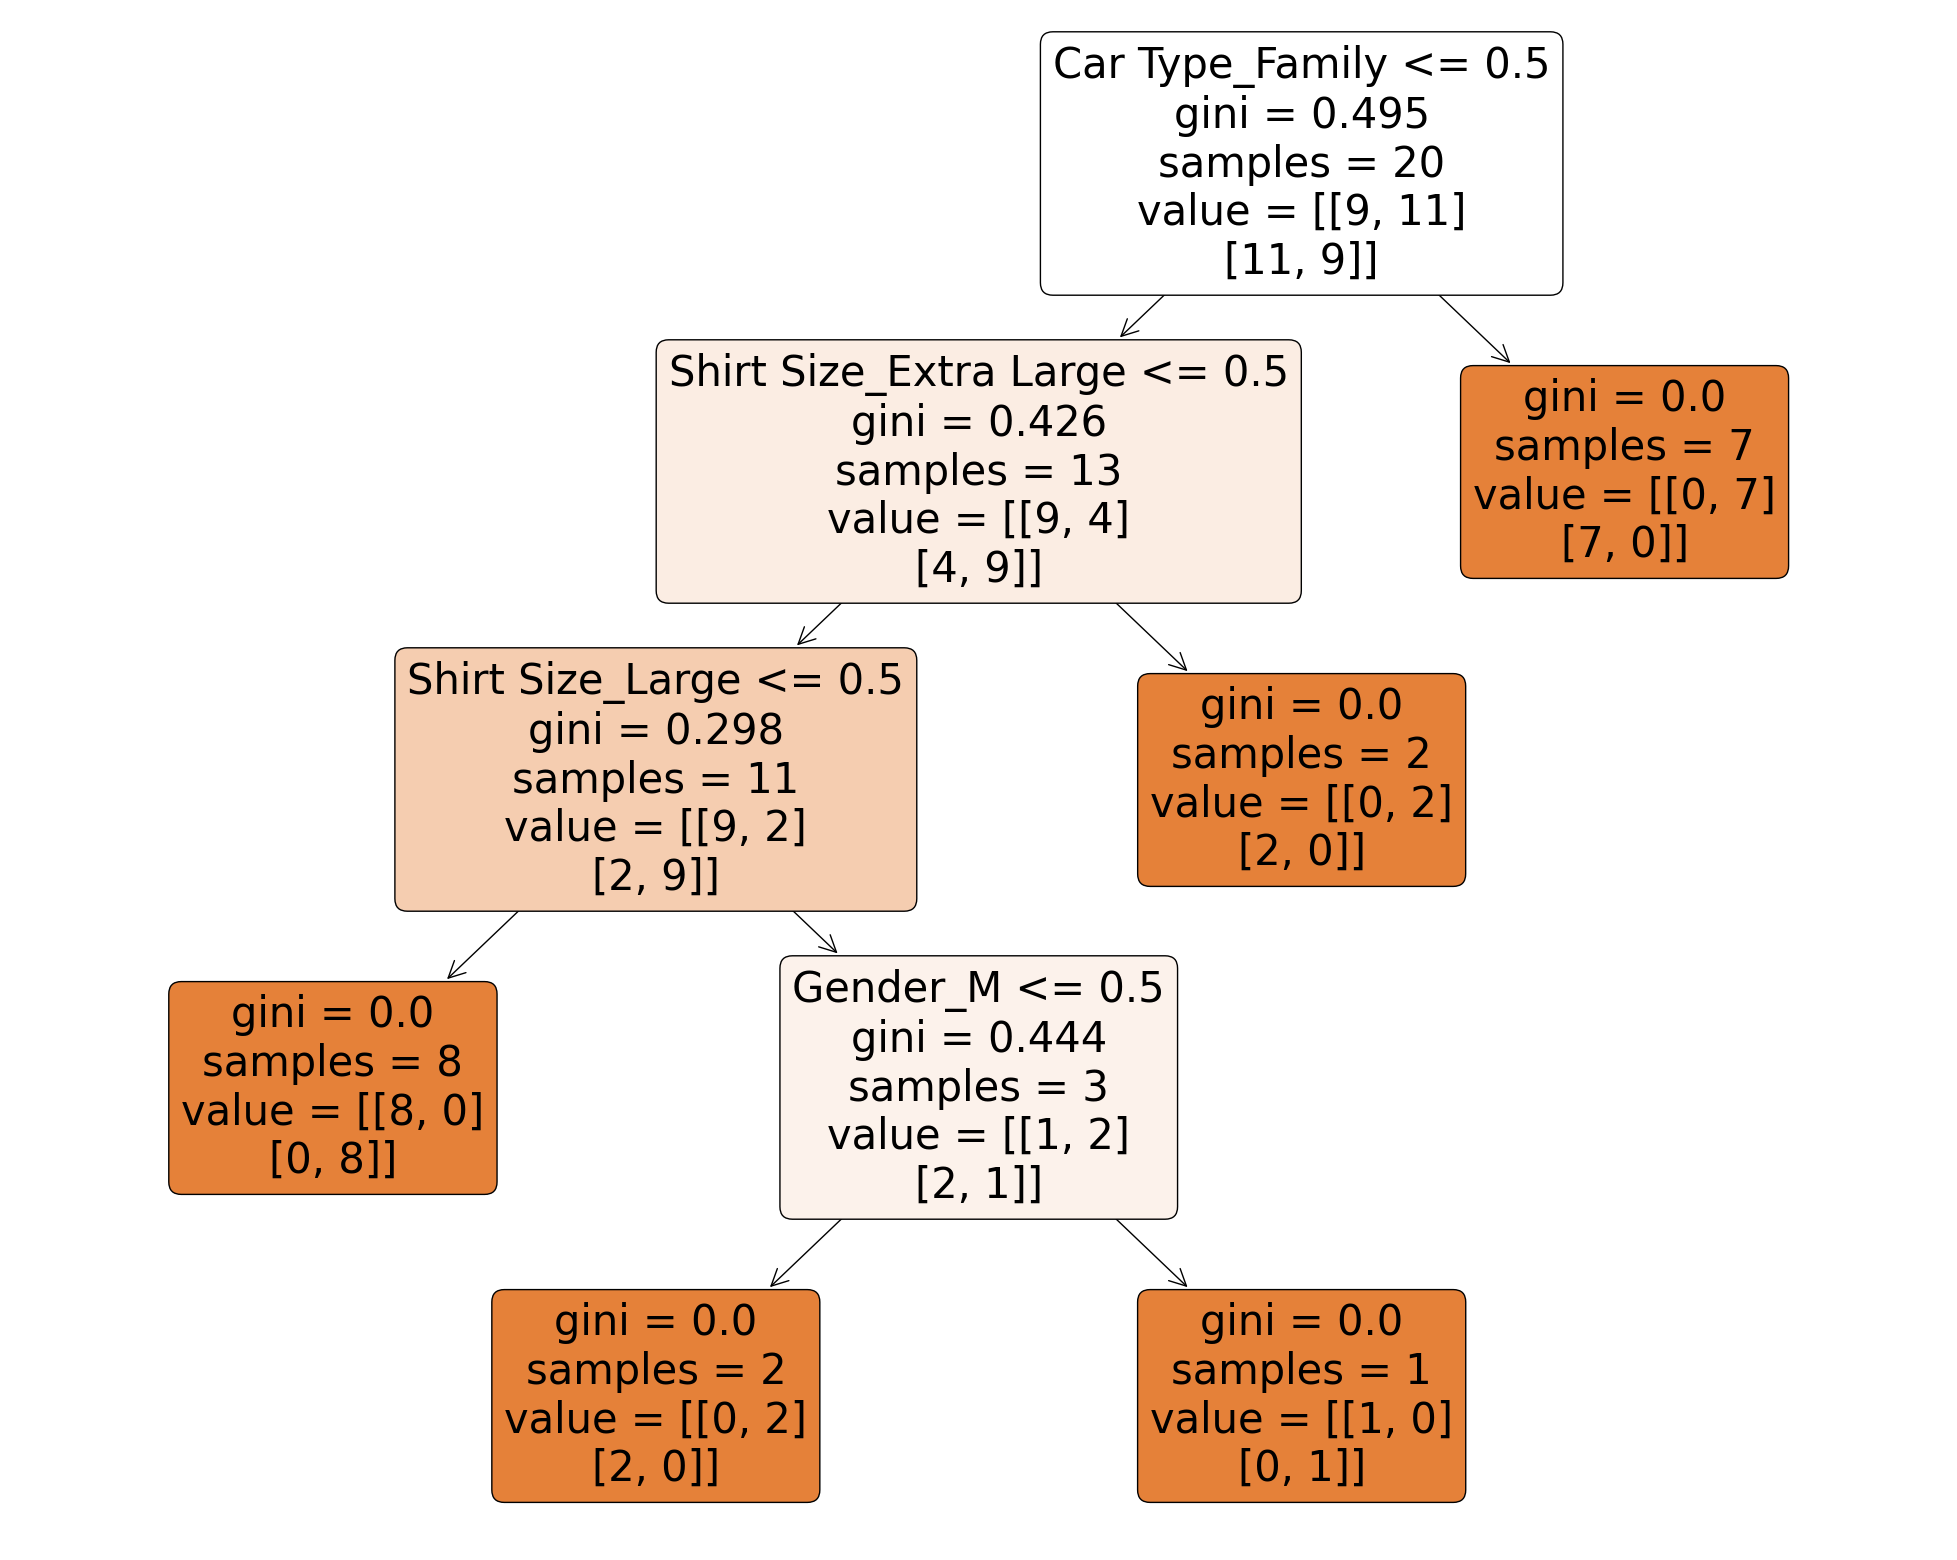

In [8]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_col,
                   class_names=['0','1'],
                   filled=True, 
                   rounded=True)


Problem 3

In [15]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
svm = SVC(kernel='linear', probability=True)
X_train = np.array([[4, 3], [4, 8], [7,2], [-1, -2], [-1, 3], [2, -1], [2, 1]])
y = [1, 1, 1, -1, -1, -1, -1]
svm.fit(X_train,y)
print("w: ",svm.coef_)
print("b: ",svm.intercept_)

w:  [[0.5 0.5]]
b:  [-2.5]


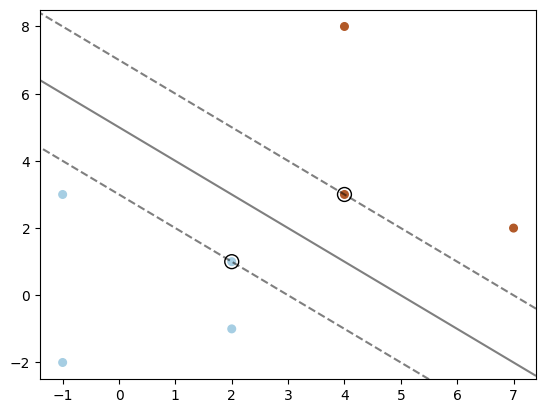

In [13]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.savefig('svm.png')

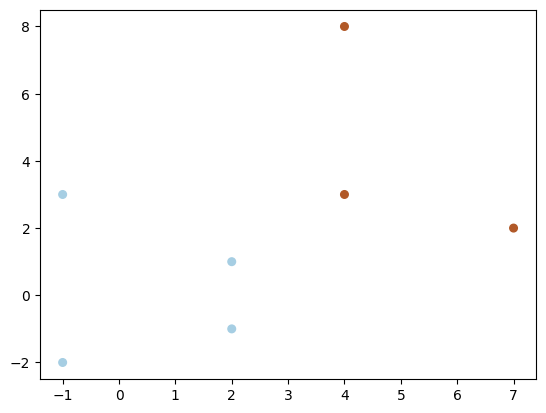

In [23]:
a = plt.scatter(X_train[:, 0], X_train[:, 1], c=y, s=30, cmap=plt.cm.Paired)
a